# Foreground - Background Color Generation for MNIST

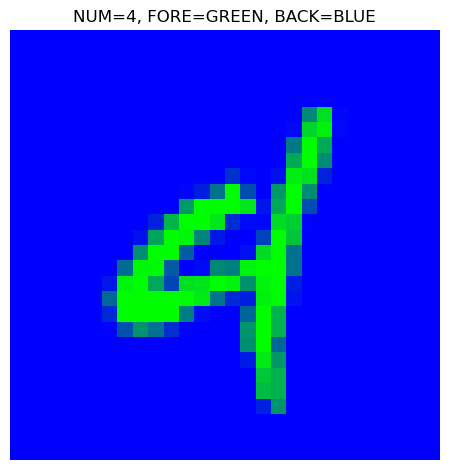

In [1]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
idx = np.random.randint(0, len(mnist))  # 0~9 사이의 숫자
image, label = mnist[idx]
pil_image = transforms.ToPILImage()(image)

# 전경과 배경 색상을 무작위로 선택합니다.
fg_color, fg_label = get_random_rainbow_color()
bg_color, bg_label = get_random_rainbow_color()

# 전경과 배경 색상이 같지 않도록 보장합니다.
while bg_color == fg_color:
  bg_color, bg_label = get_random_rainbow_color()

# 선택된 색상으로 숫자 이미지를 색칠합니다.
colored_digit = colorize_digit(pil_image, fg_color, bg_color)

if image is not None:
  # 최종 이미지를 표시합니다.
  final_image = overlay_digit_on_background(colored_digit)
  plt.imshow(final_image)
  plt.axis('off')  # 축을 비활성화합니다.
  plt.title(f'NUM={label}, FORE={fg_label}, BACK={bg_label}')

  # 레이아웃을 조정하고 화면에 표시합니다.
  plt.tight_layout()
  plt.show()

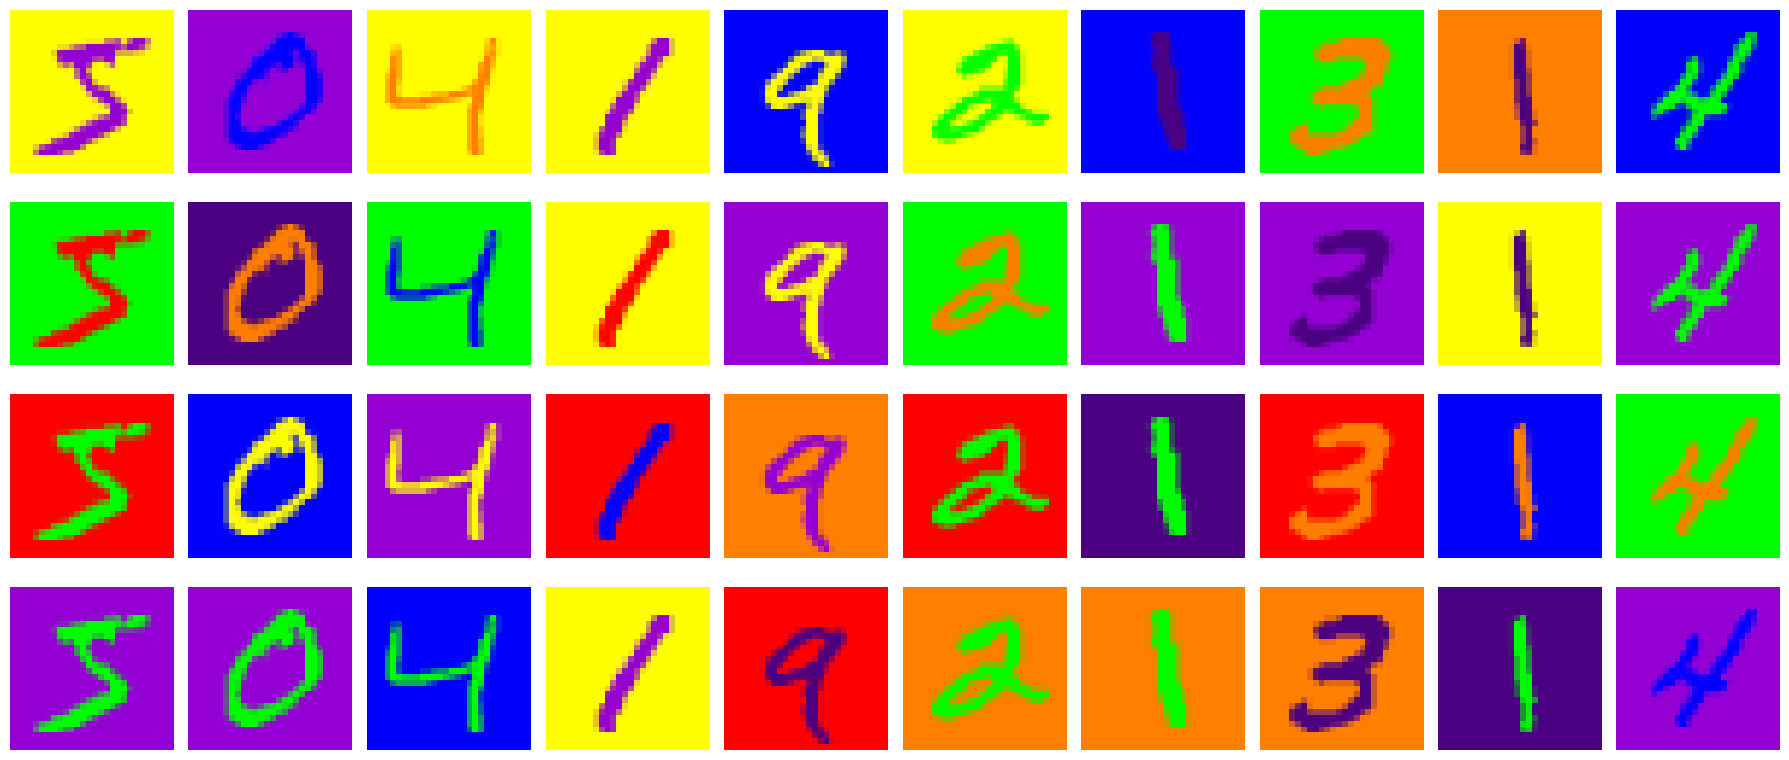

In [2]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    return RAINBOW_COLORS[np.random.randint(0, len(RAINBOW_COLORS))]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
fig, axes = plt.subplots(4, 10, figsize=(18, 8))  # 4개의 도메인(행)을 생성합니다.

for row in range(4):  # 4개의 도메인(행)에 대해 반복합니다.
    for col in range(10):  # 0부터 9까지의 숫자를 표시합니다.
        image, label = mnist[col]
        pil_image = transforms.ToPILImage()(image)

        # 전경과 배경 색상을 무작위로 선택합니다.
        fg_color = get_random_rainbow_color()
        bg_color = get_random_rainbow_color()

        # 전경과 배경 색상이 같지 않도록 보장합니다.
        while bg_color == fg_color:
            bg_color = get_random_rainbow_color()

        # 선택된 색상으로 숫자 이미지를 색칠합니다.
        colored_digit = colorize_digit(pil_image, fg_color, bg_color)

        # 최종 이미지를 표시합니다.
        final_image = overlay_digit_on_background(colored_digit)
        axes[row, col].imshow(final_image)
        # axes[row, col].imshow(image[0], cmap='gray')
        axes[row, col].axis('off')  # 축을 비활성화합니다.

# 레이아웃을 조정하고 화면에 표시합니다.
plt.tight_layout()
plt.show()


In [6]:
# final_image를 NumPy 배열로 변환
image_array = np.array(final_image)

# 배열의 크기와 데이터 유형을 확인
print("Array shape:", image_array.shape)  # 예: (28, 28, 3)
print("Data type:", image_array.dtype)

# 일부 픽셀 값 확인 (예: 왼쪽 상단 5x5 픽셀)
print("Top-left 5x5 pixels (RGB):")
print(image_array[7:9, :])

Array shape: (28, 28, 3)
Data type: uint8
Top-left 5x5 pixels (RGB):
[[[148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [ 36   0 244]
  [  1   0 254]
  [ 39   0 243]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]]

 [[148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [112   0 221]
  [ 40   0 242]
  [137   0 214]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [ 96   0 226]
  [ 11   0 251]
  [ 22   0 248]
  [120   0 219]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]
  [148   0 211]]]


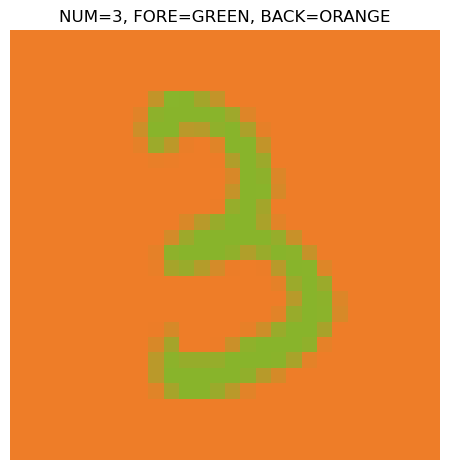

In [7]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

# MNIST test set을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
test_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

RAINBOW_COLORS = {
        'RED': [(255, 48, 39), (255, 80, 90)],
        'ORANGE': [(255, 165, 0), (238, 125, 40)],
        'YELLOW': [(218, 181, 44), (236, 231, 55)],
        'GREEN': [(71, 120, 44), (136, 181, 44)],
        'BLUE': [(64, 56, 200), (70, 132, 239)],
        'INDIGO': [(75, 12, 133), (75, 45, 130)],
        'VIOLET': [(132, 16, 115), (106, 16, 115)]
    }

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # 색상 이름과 RGB 값을 딕셔너리로 매핑합니다.


    # 무작위로 색상 이름을 선택합니다.
    fg_label = np.random.choice(RAINBOW_NAMES)
    
    # 선택된 색상 이름에 해당하는 RGB 값을 무작위로 선택합니다.
    fg_color = RAINBOW_COLORS[fg_label][np.random.randint(len(RAINBOW_COLORS[fg_label]))]
    
    return fg_color, fg_label

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 테스트셋에서 이미지를 선택하고 색상 적용
idx = np.random.randint(0, len(test_mnist))  # 0~9 사이의 숫자
image, label = test_mnist[idx]
pil_image = transforms.ToPILImage()(image)

# 전경과 배경 색상을 무작위로 선택합니다.
fg_color, fg_label = get_random_rainbow_color()

bg_color, bg_label = get_random_rainbow_color()


# 전경과 배경 색상이 같지 않도록 보장합니다.
while bg_label == fg_label:
  bg_color, bg_label = get_random_rainbow_color()

# 선택된 색상으로 숫자 이미지를 색칠합니다.
colored_digit = colorize_digit(pil_image, fg_color, bg_color)

if image is not None:
  # 최종 이미지를 표시합니다.
  final_image = overlay_digit_on_background(colored_digit)
  plt.imshow(final_image)
  plt.axis('off')  # 축을 비활성화합니다.
  plt.title(f'NUM={label}, FORE={fg_label}, BACK={bg_label}')

  # 레이아웃을 조정하고 화면에 표시합니다.
  plt.tight_layout()
  plt.show()


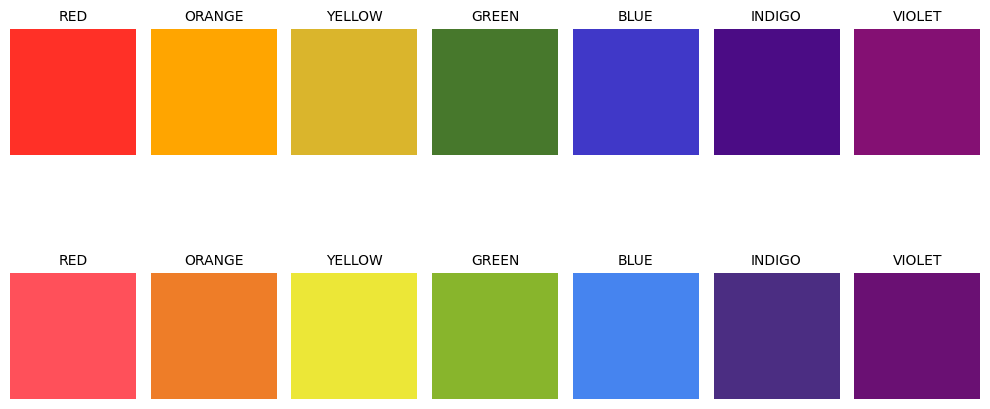

In [8]:
fig, axes = plt.subplots(2, 7, figsize=(10, 6))

for row in range(2):  # 2개의 행에 대해 반복
    for col in range(7):  # 7개의 색상에 대해 반복
        fg_label = RAINBOW_NAMES[col]  # 색상 이름

        fg_color = RAINBOW_COLORS[fg_label][row]  # 색상 팔레트에서 해당 색상 선택

        # 빈 이미지를 만들어 색칠
        blank_image = Image.new("RGB", (28, 28), color=fg_color)
        axes[row, col].imshow(blank_image)
        axes[row, col].axis('off')  # 축을 비활성화합니다.

        # 타이틀에 색상 이름을 추가합니다.
        axes[row, col].set_title(f'{fg_label}', fontsize=10)

plt.tight_layout()
plt.show()

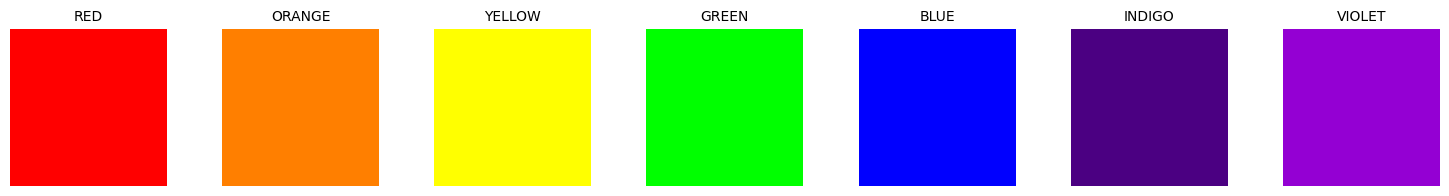

In [9]:
#이제 아래의 데이터 적재를 위해 기존팔레트로 다시 변경
import matplotlib.pyplot as plt
from PIL import Image

# 기존 팔레트 정의
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED', 'ORANGE', 'YELLOW', 'GREEN', 'BLUE', 'INDIGO', 'VIOLET'
]

# 1x7 그리드로 색상 표시
fig, axes = plt.subplots(1, 7, figsize=(15, 2))

for col in range(7):  # 0부터 6까지 반복
    fg_color = RAINBOW_COLORS[col]  # 팔레트에서 해당 색상 선택
    fg_label = RAINBOW_NAMES[col]  # 색상 이름

    # 빈 이미지를 만들어 색칠
    blank_image = Image.new("RGB", (28, 28), color=fg_color)
    
    axes[col].imshow(blank_image)
    axes[col].axis('off')  # 축을 비활성화합니다.

    # 타이틀에 색상 이름을 추가합니다.
    axes[col].set_title(f'{fg_label}', fontsize=10)

plt.tight_layout()
plt.show()


In [4]:
#모델 학습을 위한 데이터 적재
#transform = transforms.Compose([transforms.ToTensor()])
#mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

X_color = []
y_bg = []
y_fg = []
y_digit = []

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGB')
    return colored_digit

for i in range(len(mnist)):
    image, label = mnist[i]
    pil_image = transforms.ToPILImage()(image)

    # 전경과 배경 색상을 무작위로 선택합니다.
    fg_color, fg_label = get_random_rainbow_color()
    bg_color, bg_label = get_random_rainbow_color()

    # 전경과 배경 색상이 같지 않도록 보장합니다.
    while bg_color == fg_color:
        bg_color, bg_label = get_random_rainbow_color()

    # 전경 및 배경 색상이 적용된 숫자 이미지를 생성합니다.
    colored_digit = colorize_digit(pil_image, fg_color, bg_color)
    
    # 결과 이미지를 numpy 배열로 변환하고 리스트에 추가합니다.
    X_color.append(np.array(colored_digit))
    y_digit.append(label)
    y_fg.append(fg_label)
    y_bg.append(bg_label)

#리스트를 Numpy로 변환
X_color = np.array(X_color)
y_digit = np.array(y_digit)
y_fg = np.array(y_fg)
y_bg = np.array(y_bg)

# 데이터 형태를 확인합니다.
print(f"X_color.shape: {X_color.shape}")
print(f"y_digit.shape: {y_digit.shape}")
print(f"y_fg.shape: {y_fg.shape}")
print(f"y_bg.shape: {y_bg.shape}")

X_color.shape: (60000, 28, 28, 3)
y_digit.shape: (60000,)
y_fg.shape: (60000,)
y_bg.shape: (60000,)


In [11]:
print(X_color.shape)
X_color[1]

(60000, 28, 28, 3)


array([[[ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130],
        ...,
        [ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130]],

       [[ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130],
        ...,
        [ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130]],

       [[ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130],
        ...,
        [ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130]],

       ...,

       [[ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130],
        ...,
        [ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130]],

       [[ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130],
        ...,
        [ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130]],

       [[ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130],
        ...,
        [ 75,   0, 130],
        [ 75,   0, 130],
        [ 75,   0, 130]]

In [12]:
y_fg[1]

'VIOLET'

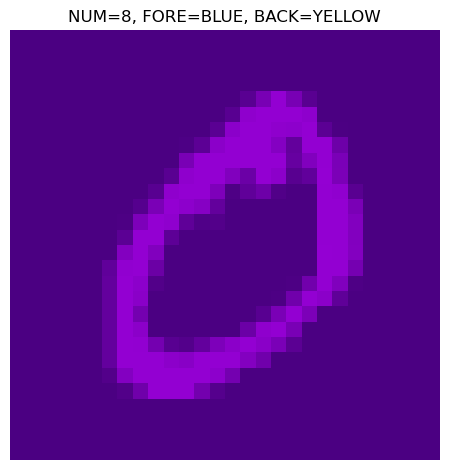

In [13]:
plt.imshow(X_color[1])
plt.axis('off')  # 축을 비활성화합니다.
plt.title(f'NUM={label}, FORE={fg_label}, BACK={bg_label}')

# 레이아웃을 조정하고 화면에 표시합니다.
plt.tight_layout()
plt.show()

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# X_color를 (60000, 28, 28, 3)에서 (60000, 2352)로 변환 (flatten)
X_color = np.array(X_color).reshape(-1, 28 * 28 * 3)

# 변환된 X_color_flat의 shape 확인
print(X_color.shape)  # (60000, 2352)

# X_color와 y_fg, y_bg, y_digit에 대한 훈련/검증 세트를 나누기
X_train, X_test = X_color[:50000], X_color[50000:]
y_train_fg, y_test_fg = y_fg[:50000], y_fg[50000:]
y_train_bg, y_test_bg = y_bg[:50000], y_bg[50000:]
y_train_digit, y_test_digit = y_digit[:50000], y_digit[50000:]

# X_train, y_train_fg, y_train_bg, y_train_digit을 한 번에 훈련/검증 세트로 나누기
X_train_split, X_val_split, y_train_fg_split, y_val_fg_split, y_train_bg_split, y_val_bg_split, y_train_digit_split, y_val_digit_split = train_test_split(
    X_train, y_train_fg, y_train_bg, y_train_digit, test_size=0.1, random_state=42
)

(60000, 2352)


In [9]:
# RandomForest 모델

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model_fg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_digit = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습 
rf_model_fg.fit(X_train_split, y_train_fg_split)
rf_model_bg.fit(X_train_split, y_train_bg_split)
rf_model_digit.fit(X_train_split, y_train_digit_split)

# 검증 데이터로 예측
y_val_fg_pred = rf_model_fg.predict(X_val_split)
y_val_bg_pred = rf_model_bg.predict(X_val_split)
y_val_digit_pred = rf_model_digit.predict(X_val_split)

# 정확도 평가
accuracy_fg_rf = accuracy_score(y_val_fg_split, y_val_fg_pred)
print(f"Random Forest 전경 색상(fg) 정확도: {accuracy_fg_rf:.4f}")
accuracy_bg_rf = accuracy_score(y_val_bg_split, y_val_bg_pred)
print(f"Random Forest 배경 색상(bg) 정확도: {accuracy_bg_rf:.4f}")
accuracy_digit_rf = accuracy_score(y_val_digit_split, y_val_digit_pred)
print(f"Random Forest 숫자(digit) 정확도: {accuracy_digit_rf:.4f}")

Random Forest 전경 색상(fg) 정확도: 0.9990
Random Forest 배경 색상(bg) 정확도: 1.0000
Random Forest 숫자(digit) 정확도: 0.9262


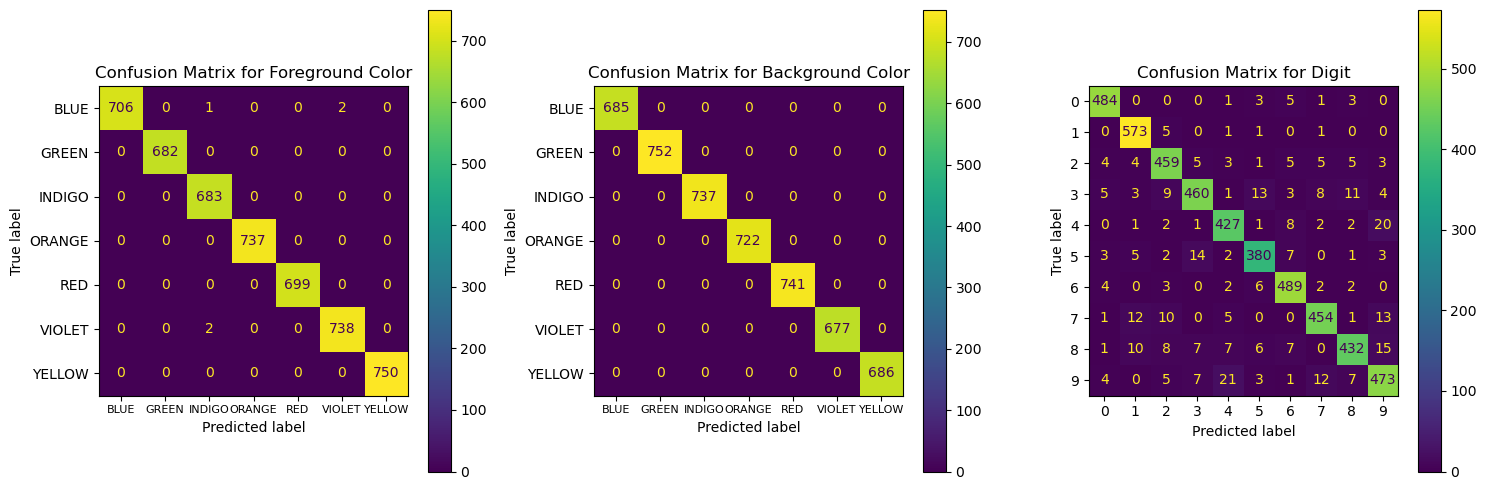

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix 생성
confusion_matrix_fg = confusion_matrix(y_val_fg_split, y_val_fg_pred)
confusion_matrix_bg = confusion_matrix(y_val_bg_split, y_val_bg_pred)
confusion_matrix_digit = confusion_matrix(y_val_digit_split, y_val_digit_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg, display_labels=np.unique(y_val_fg_split))
cmd_fg.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Foreground Color')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 배경 색상(bg)
cmd_bg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg, display_labels=np.unique(y_val_bg_split))
cmd_bg.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix for Background Color')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 숫자(digit)
cmd_digit = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit)
cmd_digit.plot(ax=axes[2])
axes[2].set_title('Confusion Matrix for Digit')

# 출력
plt.tight_layout()
plt.show()

In [61]:
#약 86초 소요, GridSearchCV나 RandomizedSearchCV를 사용한 파라미터 튜닝 고려하기

In [19]:
#SVM 모델

from sklearn.svm import SVC

svm_model_fg = SVC(random_state=42)
svm_model_bg = SVC(random_state=42)
svm_model_digit = SVC(random_state=42)

#모델 학습
svm_model_fg.fit(X_train_split, y_train_fg_split)
svm_model_bg.fit(X_train_split, y_train_bg_split)
svm_model_digit.fit(X_train_split, y_train_digit_split)

# 예측
y_val_fg_pred = svm_model_fg.predict(X_val_split)
y_val_bg_pred = svm_model_bg.predict(X_val_split)
y_val_digit_pred = svm_model_digit.predict(X_val_split)

# 정확도 평가
accuracy_fg_svm = accuracy_score(y_val_fg_split, y_val_fg_pred)
print(f"SVM 전경 색상(fg) 정확도: {accuracy_fg_svm:.4f}")
accuracy_bg_svm = accuracy_score(y_val_bg_split, y_val_bg_pred)
print(f"SVM 배경 색상(bg) 정확도: {accuracy_bg_svm:.4f}")
accuracy_digit_svm = accuracy_score(y_val_digit_split, y_val_digit_pred)
print(f"SVM 숫자(digit) 정확도: {accuracy_digit_svm:.4f}")

SVM 전경 색상(fg) 정확도: 0.9924
SVM 배경 색상(bg) 정확도: 1.0000
SVM 숫자(digit) 정확도: 0.8200


In [ ]:
# SVM 돌리는데 5분정도(300초) 소요!!!

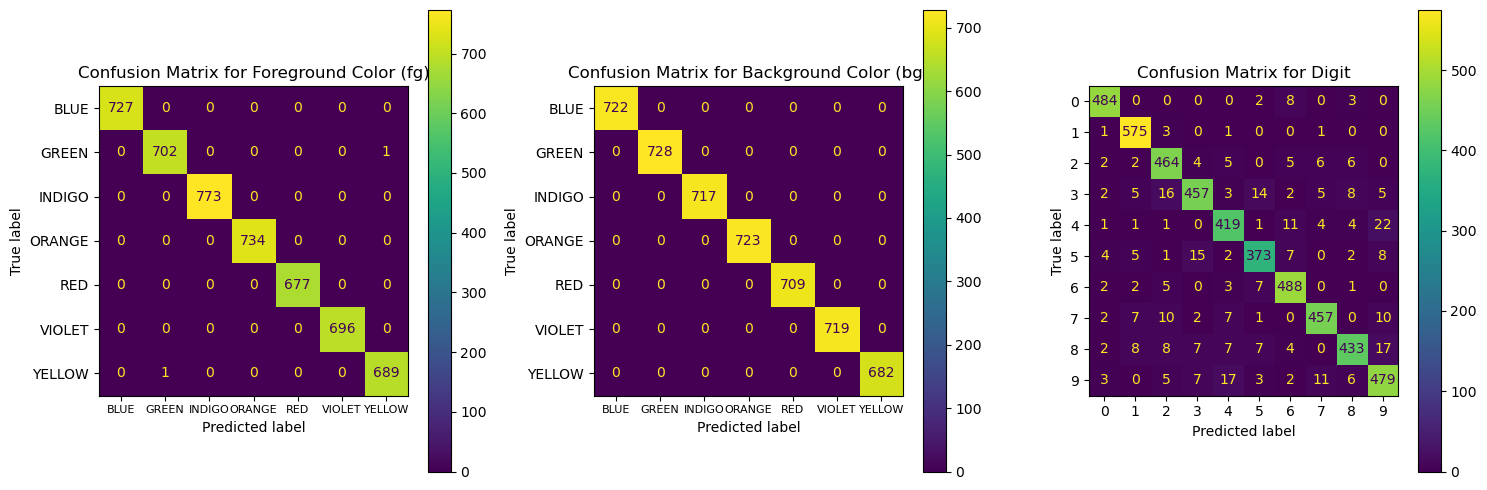

In [41]:
# Confusion Matrix 생성

confusion_matrix_fg = confusion_matrix(y_val_fg_split, y_val_fg_pred)
confusion_matrix_bg = confusion_matrix(y_val_bg_split, y_val_bg_pred)
confusion_matrix_digit = confusion_matrix(y_val_digit_split, y_val_digit_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg, display_labels=np.unique(y_val_fg_split))
cmd_fg.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Foreground Color (fg)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 배경 색상(bg)
cmd_bg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg, display_labels=np.unique(y_val_bg_split))
cmd_bg.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix for Background Color (bg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 숫자(digit)
cmd_digit = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit)
cmd_digit.plot(ax=axes[2])
axes[2].set_title('Confusion Matrix for Digit')

# 레이아웃 정리
plt.tight_layout()
plt.show()

In [11]:
# KNN 모델

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model_fg = KNeighborsClassifier(n_neighbors=5)
knn_model_bg = KNeighborsClassifier(n_neighbors=5)
knn_model_digit = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn_model_fg.fit(X_train_split, y_train_fg_split)
knn_model_bg.fit(X_train_split, y_train_bg_split)
knn_model_digit.fit(X_train_split, y_train_digit_split)

# 예측
y_val_fg_pred = knn_model_fg.predict(X_val_split)
y_val_bg_pred = knn_model_bg.predict(X_val_split)
y_val_digit_pred = knn_model_digit.predict(X_val_split)

# 정확도 평가
accuracy_fg_knn = accuracy_score(y_val_fg_split, y_val_fg_pred)
accuracy_bg_knn = accuracy_score(y_val_bg_split, y_val_bg_pred)
accuracy_digit_knn = accuracy_score(y_val_digit_split, y_val_digit_pred)

print(f"KNN 전경 색상(fg) 정확도: {accuracy_fg_knn:.4f}")
print(f"KNN 배경 색상(bg) 정확도: {accuracy_bg_knn:.4f}")
print(f"KNN 숫자(digit) 정확도: {accuracy_digit_knn:.4f}")

KNN 전경 색상(fg) 정확도: 0.8382
KNN 배경 색상(bg) 정확도: 1.0000
KNN 숫자(digit) 정확도: 0.8894


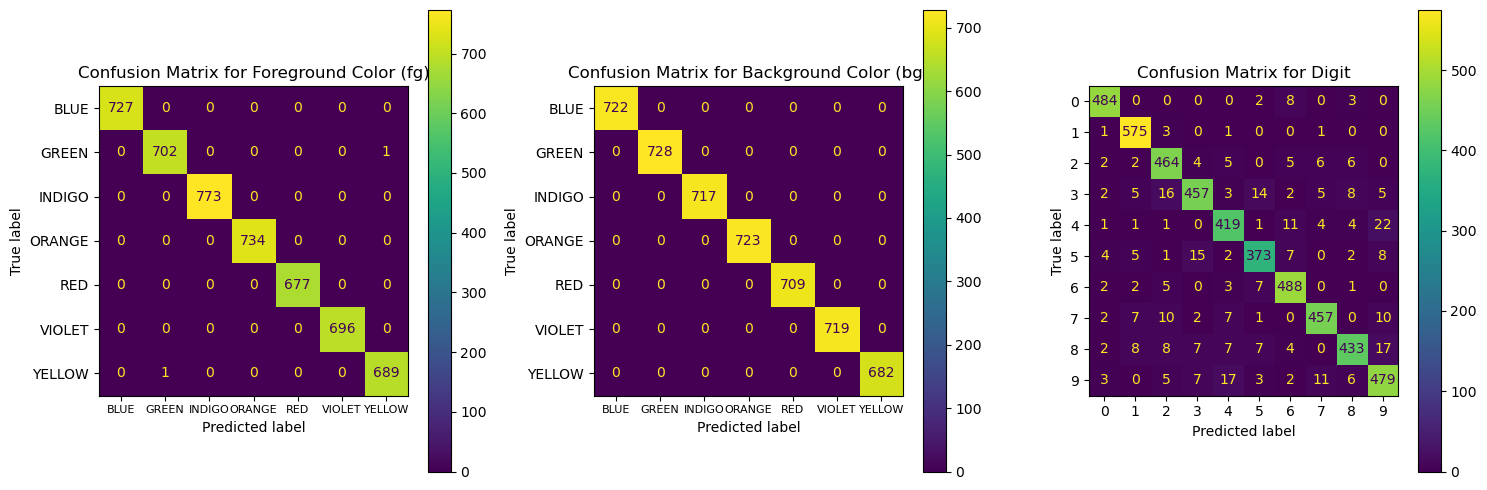

In [42]:
# Confusion Matrix 생성
confusion_matrix_fg = confusion_matrix(y_val_fg_split, y_val_fg_pred)
confusion_matrix_bg = confusion_matrix(y_val_bg_split, y_val_bg_pred)
confusion_matrix_digit = confusion_matrix(y_val_digit_split, y_val_digit_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg, display_labels=np.unique(y_val_fg_split))
cmd_fg.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Foreground Color (fg)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 배경 색상(bg)
cmd_bg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg, display_labels=np.unique(y_val_bg_split))
cmd_bg.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix for Background Color (bg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8)

# 숫자(digit)
cmd_digit = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit)
cmd_digit.plot(ax=axes[2])
axes[2].set_title('Confusion Matrix for Digit')

# 레이아웃 정리
plt.tight_layout()
plt.show()

In [27]:
y_val_fg_pred[1]

'GREEN'

SGD 전경 색상(fg) 정확도: 0.7412
SGD 배경 색상(bg) 정확도: 0.9050
SGD 숫자(digit) 정확도: 0.1198


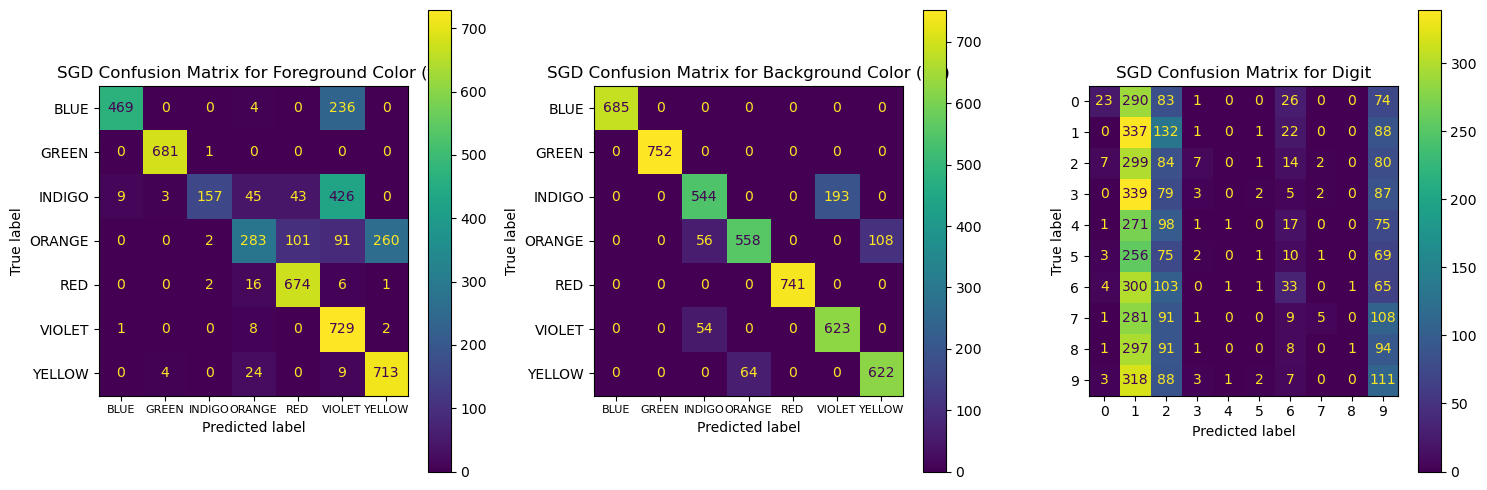

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# SGDClassifier 모델 정의
sgd_model_fg = SGDClassifier(random_state=42)
sgd_model_bg = SGDClassifier(random_state=42)
sgd_model_digit = SGDClassifier(random_state=42)

# SGD 모델 학습
sgd_model_fg.fit(X_train_split, y_train_fg_split)
sgd_model_bg.fit(X_train_split, y_train_bg_split)
sgd_model_digit.fit(X_train_split, y_train_digit_split)

# SGD 예측
y_val_fg_pred_sgd = sgd_model_fg.predict(X_val_split)
y_val_bg_pred_sgd = sgd_model_bg.predict(X_val_split)
y_val_digit_pred_sgd = sgd_model_digit.predict(X_val_split)

# SGD 정확도 평가
accuracy_fg_sgd = accuracy_score(y_val_fg_split, y_val_fg_pred_sgd)
accuracy_bg_sgd = accuracy_score(y_val_bg_split, y_val_bg_pred_sgd)
accuracy_digit_sgd = accuracy_score(y_val_digit_split, y_val_digit_pred_sgd)

print(f"SGD 전경 색상(fg) 정확도: {accuracy_fg_sgd:.4f}")
print(f"SGD 배경 색상(bg) 정확도: {accuracy_bg_sgd:.4f}")
print(f"SGD 숫자(digit) 정확도: {accuracy_digit_sgd:.4f}")

# Confusion Matrix 생성
confusion_matrix_fg_sgd = confusion_matrix(y_val_fg_split, y_val_fg_pred_sgd)
confusion_matrix_bg_sgd = confusion_matrix(y_val_bg_split, y_val_bg_pred_sgd)
confusion_matrix_digit_sgd = confusion_matrix(y_val_digit_split, y_val_digit_pred_sgd)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg_sgd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg_sgd, display_labels=np.unique(y_val_fg_split))
cmd_fg_sgd.plot(ax=axes[0])
axes[0].set_title('SGD Confusion Matrix for Foreground Color (fg)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8)

# 배경 색상(bg)
cmd_bg_sgd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg_sgd, display_labels=np.unique(y_val_bg_split))
cmd_bg_sgd.plot(ax=axes[1])
axes[1].set_title('SGD Confusion Matrix for Background Color (bg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8)

# 숫자(digit)
cmd_digit_sgd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit_sgd, display_labels=np.unique(y_val_digit_split))
cmd_digit_sgd.plot(ax=axes[2])
axes[2].set_title('SGD Confusion Matrix for Digit')

# 레이아웃 정리
plt.tight_layout()
plt.show()

Naive Bayes 전경 색상(fg) 정확도: 0.4182
Naive Bayes 배경 색상(bg) 정확도: 1.0000
Naive Bayes 숫자(digit) 정확도: 0.0982


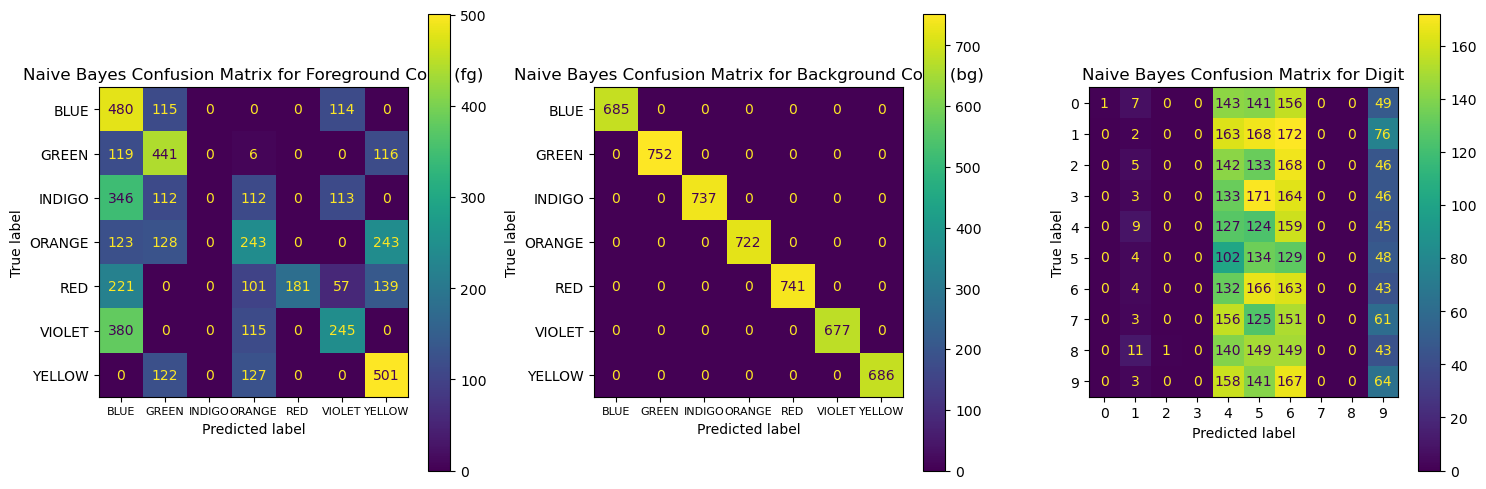

In [8]:
# GaussianNB 모델 정의
nb_model_fg = GaussianNB()
nb_model_bg = GaussianNB()
nb_model_digit = GaussianNB()

# Naive Bayes 모델 학습
nb_model_fg.fit(X_train_split, y_train_fg_split)
nb_model_bg.fit(X_train_split, y_train_bg_split)
nb_model_digit.fit(X_train_split, y_train_digit_split)

# Naive Bayes 예측
y_val_fg_pred_nb = nb_model_fg.predict(X_val_split)
y_val_bg_pred_nb = nb_model_bg.predict(X_val_split)
y_val_digit_pred_nb = nb_model_digit.predict(X_val_split)

# Naive Bayes 정확도 평가
accuracy_fg_nb = accuracy_score(y_val_fg_split, y_val_fg_pred_nb)
accuracy_bg_nb = accuracy_score(y_val_bg_split, y_val_bg_pred_nb)
accuracy_digit_nb = accuracy_score(y_val_digit_split, y_val_digit_pred_nb)

print(f"Naive Bayes 전경 색상(fg) 정확도: {accuracy_fg_nb:.4f}")
print(f"Naive Bayes 배경 색상(bg) 정확도: {accuracy_bg_nb:.4f}")
print(f"Naive Bayes 숫자(digit) 정확도: {accuracy_digit_nb:.4f}")

# Naive Bayes Confusion Matrix 생성
confusion_matrix_fg_nb = confusion_matrix(y_val_fg_split, y_val_fg_pred_nb)
confusion_matrix_bg_nb = confusion_matrix(y_val_bg_split, y_val_bg_pred_nb)
confusion_matrix_digit_nb = confusion_matrix(y_val_digit_split, y_val_digit_pred_nb)

# 시각화 (Naive Bayes)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cmd_fg_nb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg_nb, display_labels=np.unique(y_val_fg_split))
cmd_fg_nb.plot(ax=axes[0])
axes[0].set_title('Naive Bayes Confusion Matrix for Foreground Color (fg)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8)

cmd_bg_nb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg_nb, display_labels=np.unique(y_val_bg_split))
cmd_bg_nb.plot(ax=axes[1])
axes[1].set_title('Naive Bayes Confusion Matrix for Background Color (bg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8)

cmd_digit_nb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit_nb, display_labels=np.unique(y_val_digit_split))
cmd_digit_nb.plot(ax=axes[2])
axes[2].set_title('Naive Bayes Confusion Matrix for Digit')

plt.tight_layout()
plt.show()